<img src = images/diabetes.jpg width = '2000' height = '3700' >

# Diabetes - Business Problem
---

Diabetes is a chronic long-lasting health condition that affects how your body turns food into energy. Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Diabetes often leads to cardiovascular disease, stroke, kidney damage, and long-term damage to the extremities such as the limbs and eyes.

In this project, we will use machine learning algorithms to address the issue of diabetes. We will use the labeled vital measurements of the patients for example, "Age and Blood Insulin Level" from data then train them using machine learning neural networks to make predictions on new patients.

## The Diabetes Dataset

The dataset that will be used in this project is obtained from the Pima Indians Diebetes dataset, as provided by the National Institute of Diabtes, Digestive, and Kidney Diseases and hosted by Kaggle.

In [2]:
!ls Data

diabetes.csv


In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

## Exploritory Data Analysis ( EDA )

In [4]:
df = pd.read_csv('Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

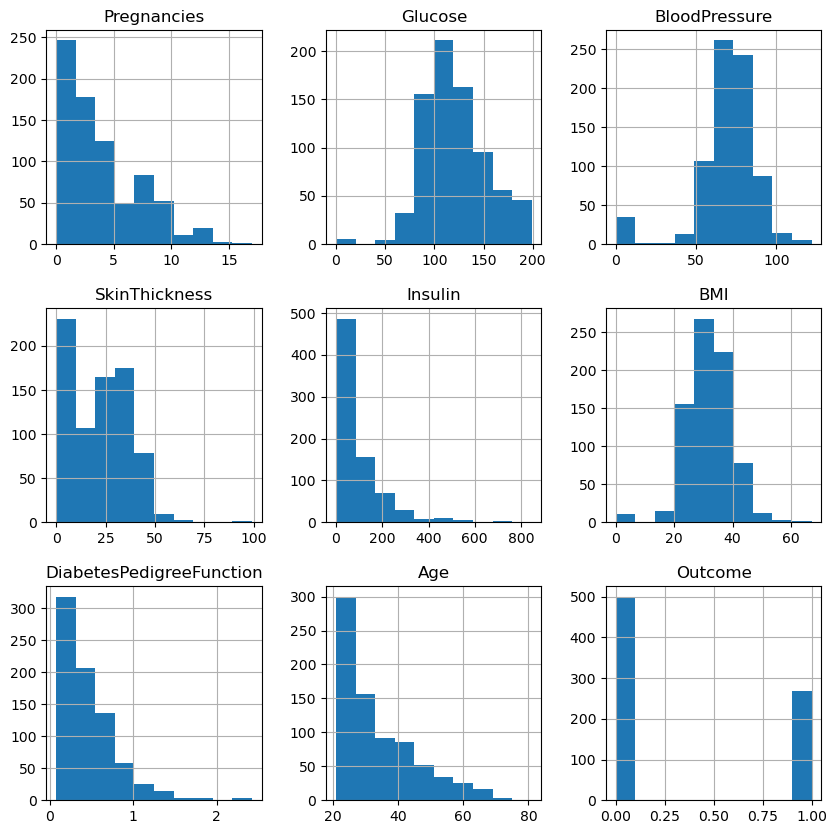

In [35]:
df.hist(figsize = (10, 10))
plt.show()

- As showing in our Age histogram above, the data was collected from young people between the age of 20 - 30 years old.
- The distribution of BMI and BloodPressure are normally distributed.
- We have people with almost 200 glucose plasma concentration and on the opposite side we have people with 0 values for BMI, BloodPressure, and Glucose. Logically, it's not possible to have a 0 value for these measurements, and it might indicate that we have some missing values.
- On the pregnancies histogram we can see the previous pregnacies are about 15 it's not impossible but it indicates that there's an outlier.
- DiabetesPedigreeFunction and Insullin variables ranges from 0 - 2.5 and 0 - 800. These indicates that our variables are on a different scales, which can cause a problem sometimes when training our data in neural networks.